In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, os.path.abspath('.'))

import QGBx


In [17]:
import QGBx

In [41]:
from QGBx.distibutions import Gaussian

In [56]:
device = QGBx.Device("default.qubit", shots = 1000)
distribution = Gaussian(device)
Gb = QGBx.Generator(device, distribution).galton_board(4)

Working


In [55]:
distribution.ideal_distribution()

array([0.0028733 , 0.00768934, 0.01787826, 0.03611508, 0.06338393,
       0.09664896, 0.12803907, 0.14737206, 0.14737206, 0.12803907,
       0.09664896, 0.06338393, 0.03611508, 0.01787826, 0.00768934,
       0.0028733 ])

(<Figure size 4900x1225 with 1 Axes>, <Axes: >)


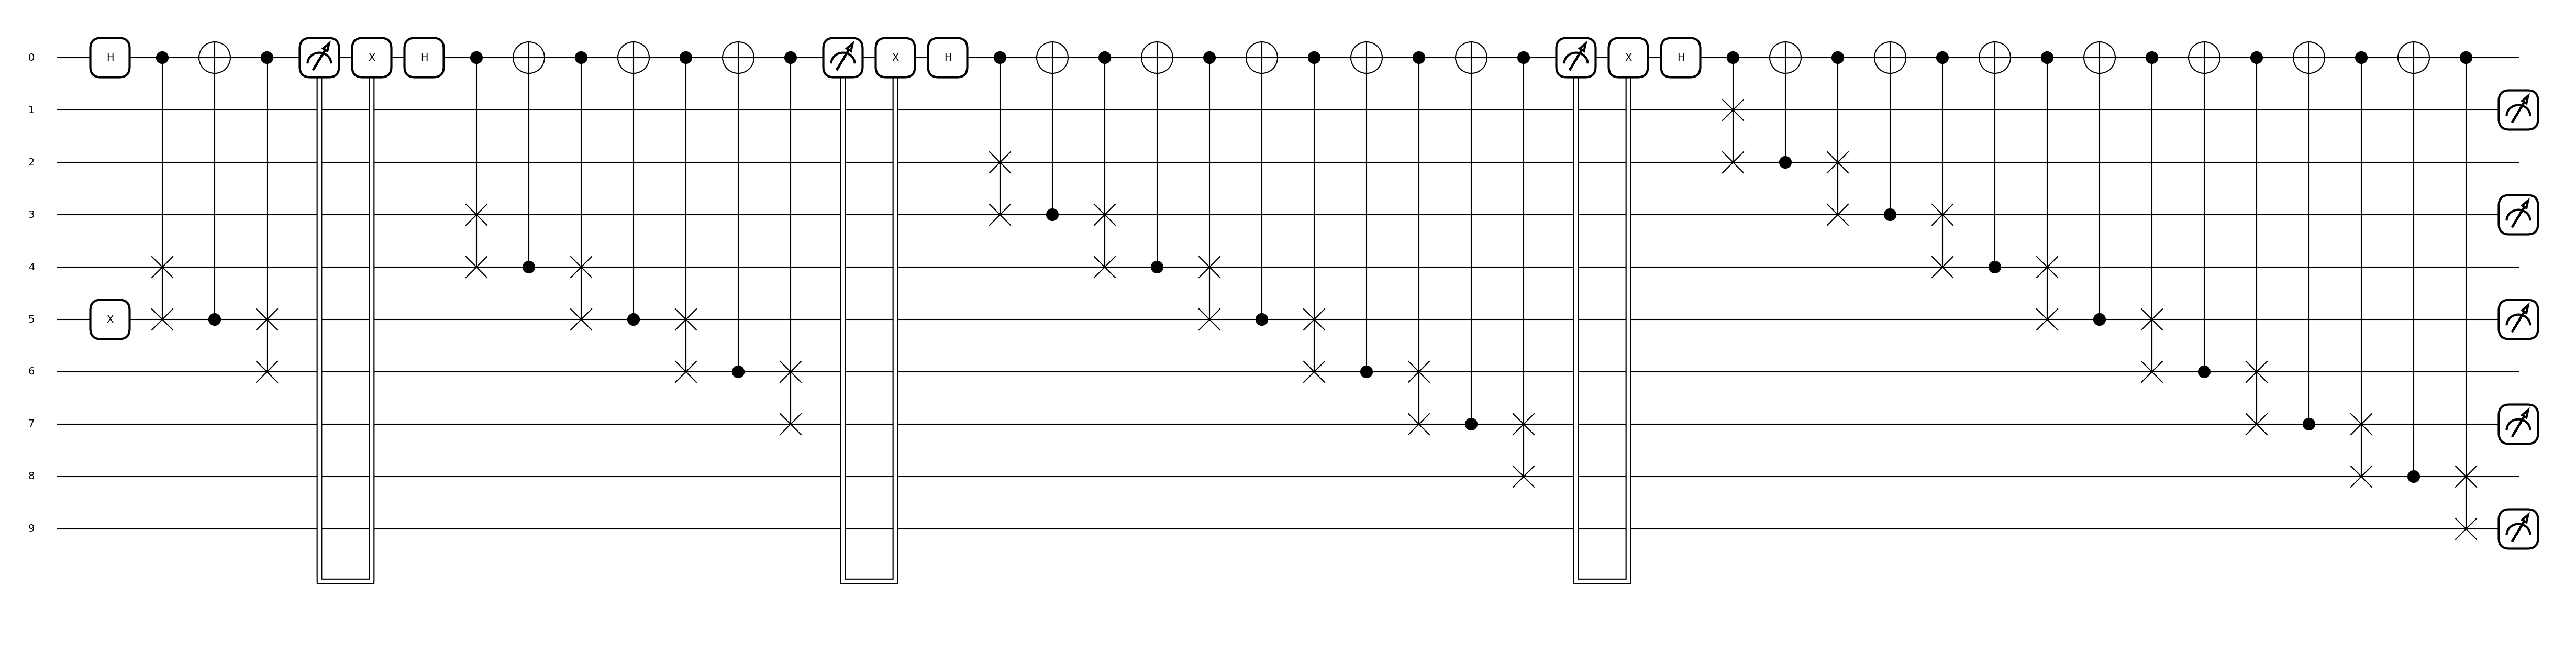

In [57]:
drawer = qml.draw_mpl(Gb)()
print(drawer)

In [58]:
from QGBx.distibutions import HadamardQW

In [126]:
device = QGBx.Device("default.qubit", shots = 1000)
distribution = HadamardQW(device)
gen = QGBx.Generator(device, distribution, path = "C:/Users/Client/Desktop/testing package things")
gen.galton_board(5)


Working


<QNode: device='<default.qubit device (wires=12, shots=1000) at 0x239c15789d0>', interface='auto', diff_method='best'>

In [127]:
dist = QGBx.Runner(gen).get_distribution()


Probabilities of finding the ball at certain position:


In [128]:
QGBx.Visualiser(dist).bar_plot()

AttributeError: 'Visualiser' object has no attribute 'bar_plot'

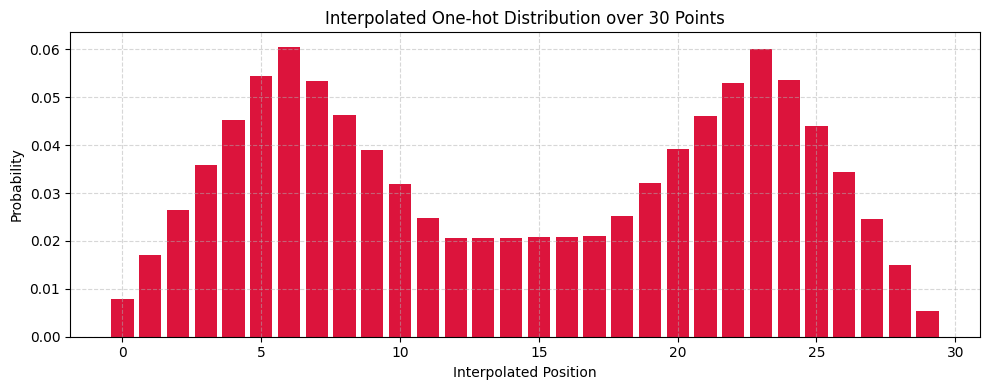

In [129]:
QGBx.Visualiser(dist).plot_interpolated_distribution()

In [130]:
dist

{(0, 0, 0, 0, 0, 1): 0.03,
 (0, 0, 0, 0, 1, 0): 0.345,
 (0, 0, 0, 1, 0, 0): 0.118,
 (0, 0, 1, 0, 0, 0): 0.115,
 (0, 1, 0, 0, 0, 0): 0.348,
 (1, 0, 0, 0, 0, 0): 0.044}

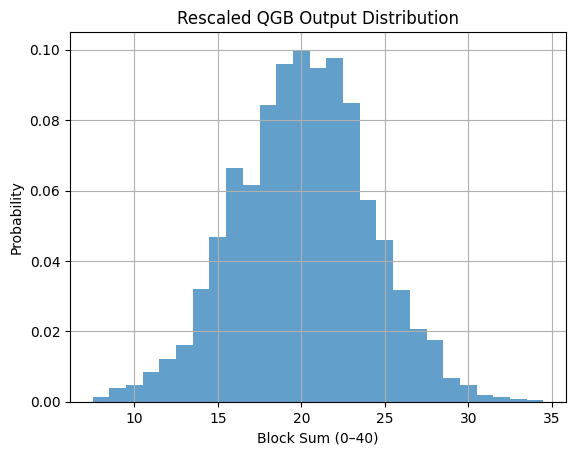

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Mapping from bitstring to integer label


# Assign integer labels
bit_to_int = {bits: i for i, bits in enumerate(dist)}
probs = [dist[bits] for bits in bit_to_int]
values = list(bit_to_int.values())

# Simulate sampling (e.g. 20,000 shots)
num_shots = 20000
samples = np.random.choice(values, size=num_shots, p=probs)

# Group into blocks of 8, compute block sums
block_size = 8
num_blocks = num_shots // block_size
block_sums = [np.sum(samples[i*block_size:(i+1)*block_size]) for i in range(num_blocks)]

# Histogram
sum_counts = Counter(block_sums)
x_vals = np.array(sorted(sum_counts.keys()))
y_vals = np.array([sum_counts[x] for x in x_vals])

# Normalize to probability
y_vals = y_vals / y_vals.sum()

# Plot histogram
plt.bar(x_vals, y_vals, width=1.0, align='center', alpha=0.7, label="QGB Rescaled Output")
plt.xlabel("Block Sum (0–40)")
plt.ylabel("Probability")
plt.title("Rescaled QGB Output Distribution")
plt.grid(True)


